In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [198]:
cur_dir = os.getcwd()
img_dir = os.path.join(cur_dir, 'dataset', 'images','train')
label_dir = os.path.join(cur_dir, 'dataset', 'labels','train')

In [199]:
#get all names of training images
img_names = sorted(os.listdir(img_dir))
#because of all images has '.png' tail so i just removed 4 last characters
img_names = [img_name[:-4] for img_name in img_names]

['1', '0.28398895790200135', '0.6459627329192547', '0.4095928226363009', '0.6563146997929606', '0.3819875776397516', '0.722567287784679', '0.26328502415458943', '0.7111801242236024']


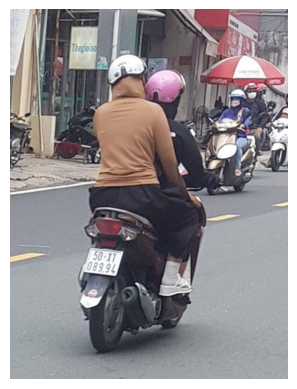

In [4]:
#read image and its label base on name
def read_data(data_name):
    img = mpimg.imread(img_dir + '/' + data_name + '.png')
    label = open(label_dir + '/' + data_name + '.txt', 'r').read()
    label = label.replace('\n', '').split(' ')
    return img, label

img, label = read_data(img_names[100])
#in label, first element is type of liences plate, 0 mean 1 line plate and 1 is 2 line
print(label)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
#turn label to type and points of 4 corner
def make_points(img, label):
    plate_type = label[0]
    height, width, _ = img.shape
    float_label = [float(lab) for lab in label][1:]

    points = []

    for i in range(0,8,2):
        x = float_label[i] * width
        y = float_label[i+1] * height
        points.append((x, y))

    return points, plate_type

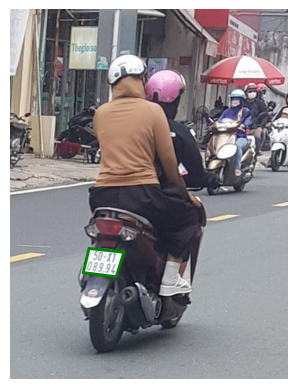

In [6]:
def plt_boundingbox(img, label):
    points = make_points(img, label)[0]

    fig, ax = plt.subplots()
    ax.imshow(img)

    # Vẽ đường viền
    polygon = patches.Polygon(points, closed=True, edgecolor='g', linewidth=2, fill=None)
    ax.add_patch(polygon)

    # Hiển thị hình ảnh với hình đã vẽ
    plt.axis('off')
    plt.show()

plt_boundingbox(img, label)

In [7]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [8]:
from ultralytics import YOLO
#download yolo model
model = YOLO('yolov8n.pt')

In [10]:
model.train(
    data = cur_dir+'/dataset/dataset.yaml',
    epochs=50,
    batch=16,
    imgsz=320
)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (11th Gen Intel Core(TM) i7-1160G7 1.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/lamb/project/dmml/car_plate/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

train: Scanning /home/lamb/project/dmml/car_plate/dataset/labels/train.cache... 3433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3433/3433 [00:00<?, ?it/s]
val: Scanning /home/lamb/project/dmml/car_plate/dataset/labels/val.cache... 1145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1145/1145 [00:00<?, ?it/s]

Plotting labels to runs/detect/train7/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.7248     0.7839     0.8689         10        320: 100%|██████████| 215/215 [03:37<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:28<00:00,  1.28it/s]

                   all       1145       1313      0.964      0.949      0.982      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.7518     0.6703     0.8871         26        320: 100%|██████████| 215/215 [03:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.30it/s]

                   all       1145       1313      0.937      0.938      0.964      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.7513     0.6332     0.8936         18        320: 100%|██████████| 215/215 [03:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]

                   all       1145       1313      0.974      0.954      0.978      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.7405     0.5852     0.8868         14        320: 100%|██████████| 215/215 [03:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.30it/s]

                   all       1145       1313      0.978      0.948      0.977      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.6988      0.517     0.8784         23        320: 100%|██████████| 215/215 [03:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.978      0.966      0.982      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.6932     0.5057     0.8784         25        320: 100%|██████████| 215/215 [03:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]

                   all       1145       1313       0.98      0.967      0.984      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.6644     0.4791     0.8762         13        320: 100%|██████████| 215/215 [03:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]

                   all       1145       1313      0.982      0.961      0.986      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.6489     0.4558     0.8686         16        320: 100%|██████████| 215/215 [03:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]

                   all       1145       1313      0.976      0.967      0.989      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.6367     0.4389     0.8659         25        320: 100%|██████████| 215/215 [03:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.30it/s]

                   all       1145       1313      0.983      0.961      0.988      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.6328     0.4326     0.8685         21        320: 100%|██████████| 215/215 [03:36<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.46it/s]

                   all       1145       1313      0.984      0.955      0.985      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      0.629     0.4226      0.869         18        320: 100%|██████████| 215/215 [03:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]

                   all       1145       1313      0.982      0.968      0.986      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.6166     0.4106     0.8596         17        320: 100%|██████████| 215/215 [04:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]

                   all       1145       1313      0.982       0.97      0.989      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.6147     0.4128     0.8636         19        320: 100%|██████████| 215/215 [03:51<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:35<00:00,  1.03it/s]

                   all       1145       1313      0.978      0.974       0.99      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.6053     0.3978     0.8609         24        320: 100%|██████████| 215/215 [03:45<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]

                   all       1145       1313      0.987       0.97      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.5977     0.3907     0.8603         15        320: 100%|██████████| 215/215 [03:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]

                   all       1145       1313      0.982      0.973      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.5901     0.3879     0.8565         19        320: 100%|██████████| 215/215 [03:27<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]

                   all       1145       1313      0.987      0.978       0.99      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.5892     0.3817     0.8581         19        320: 100%|██████████| 215/215 [03:26<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]

                   all       1145       1313      0.986      0.972      0.989      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.5892     0.3841     0.8579         15        320: 100%|██████████| 215/215 [03:25<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]

                   all       1145       1313      0.991      0.974      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.5835     0.3707     0.8565         22        320: 100%|██████████| 215/215 [03:25<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:25<00:00,  1.44it/s]

                   all       1145       1313      0.985      0.973      0.991      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.5833     0.3749     0.8574         23        320: 100%|██████████| 215/215 [03:25<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]

                   all       1145       1313      0.991      0.969      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.5599     0.3562     0.8512         18        320: 100%|██████████| 215/215 [03:26<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]

                   all       1145       1313      0.989      0.977      0.992      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.5629     0.3578     0.8511         16        320: 100%|██████████| 215/215 [03:45<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.991       0.98      0.993      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      0.567     0.3575     0.8541         19        320: 100%|██████████| 215/215 [03:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313       0.99      0.976       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.5601     0.3592     0.8535         20        320: 100%|██████████| 215/215 [03:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.989      0.974      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      0.556     0.3462     0.8483         16        320: 100%|██████████| 215/215 [03:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.992      0.974      0.992      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      0.547     0.3432     0.8494         19        320: 100%|██████████| 215/215 [03:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.988      0.976       0.99      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.5469     0.3412      0.848         29        320: 100%|██████████| 215/215 [03:55<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.987      0.981      0.992      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.5469     0.3322     0.8477         18        320: 100%|██████████| 215/215 [03:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:26<00:00,  1.33it/s]

                   all       1145       1313       0.99      0.976      0.993      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.5487     0.3343     0.8502         14        320: 100%|██████████| 215/215 [03:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313       0.99      0.979      0.991       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5309     0.3228     0.8469         11        320: 100%|██████████| 215/215 [03:51<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.988      0.981      0.993      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.5318     0.3202     0.8433         21        320: 100%|██████████| 215/215 [03:51<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.986      0.981      0.991      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.5265      0.321     0.8429         17        320: 100%|██████████| 215/215 [03:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.989       0.98      0.993      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.5297     0.3201     0.8458         16        320: 100%|██████████| 215/215 [03:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.986      0.979      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.5242     0.3112      0.842         14        320: 100%|██████████| 215/215 [03:50<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.988       0.98      0.991       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5144     0.3114     0.8441         26        320: 100%|██████████| 215/215 [03:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.986      0.981      0.992      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5157      0.306     0.8401         13        320: 100%|██████████| 215/215 [03:50<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.30it/s]

                   all       1145       1313      0.984      0.979      0.992      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5157     0.3062     0.8446         20        320: 100%|██████████| 215/215 [04:08<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.989      0.978      0.991      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5083     0.2989     0.8434         16        320: 100%|██████████| 215/215 [03:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.991      0.976      0.991      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5115     0.3005       0.84         18        320: 100%|██████████| 215/215 [03:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.986      0.979      0.993       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.4975     0.2911     0.8399         20        320: 100%|██████████| 215/215 [03:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.991       0.98      0.992      0.886


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4731     0.2674     0.8139         11        320: 100%|██████████| 215/215 [03:34<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:20<00:00,  1.79it/s]

                   all       1145       1313      0.985      0.981      0.993      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      0.466     0.2612     0.8123         10        320: 100%|██████████| 215/215 [03:43<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.30it/s]

                   all       1145       1313      0.989      0.984      0.993      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4646     0.2621     0.8117         12        320: 100%|██████████| 215/215 [03:42<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.992      0.975      0.993      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4591      0.253     0.8123          9        320: 100%|██████████| 215/215 [03:42<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.985      0.983      0.992      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4495     0.2478     0.8053          9        320: 100%|██████████| 215/215 [03:41<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.32it/s]

                   all       1145       1313      0.984      0.982      0.993      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4467     0.2466     0.8059          9        320: 100%|██████████| 215/215 [03:25<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.31it/s]

                   all       1145       1313      0.988      0.981      0.994       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4443     0.2432     0.8116          9        320: 100%|██████████| 215/215 [03:41<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.988      0.982      0.993      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4404     0.2379     0.8029          9        320: 100%|██████████| 215/215 [03:42<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.989      0.983      0.993      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4315     0.2317     0.8034         11        320: 100%|██████████| 215/215 [03:42<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:27<00:00,  1.33it/s]

                   all       1145       1313      0.992      0.981      0.993      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4308     0.2287     0.8011          9        320: 100%|██████████| 215/215 [03:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]

                   all       1145       1313       0.99      0.981      0.993      0.896



50 epochs completed in 3.501 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (11th Gen Intel Core(TM) i7-1160G7 1.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:26<00:00,  1.33it/s]


                   all       1145       1313       0.99      0.981      0.993      0.896
                   BSD       1145        410      0.997      0.988      0.995      0.889
                   BSV       1145        903      0.983      0.975      0.991      0.903
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eb54ea4e9e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [76]:
def predict_plot(path_test_car):
    #predict
    results = model.predict(path_test_car, device='cpu')[0]
    #take the bounding box and label of the predict image
    boxes = results.boxes
    names = results.names
    img = results.orig_img

    fig, ax = plt.subplots(1, figsize=(6, 6))
    img = img[:,:,::-1]#reverse image from bgr to rgb
    ax.imshow(img)

    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0]
        conf = box.conf[0]
        cls = box.cls[0]
        
        label = names[int(cls)]
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='green', facecolor='none')
        ax.add_patch(rect)
        
        label_text = f'{label} {conf:.2}%'
        plt.text(xmin, ymin - 10, label_text, color='red', fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
    plt.axis('off')
    plt.show()


image 1/1 /home/lamb/project/dmml/car_plate/dataset/images/test/test_xe4.png: 224x320 4 BSVs, 17.8ms
Speed: 0.7ms preprocess, 17.8ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 320)


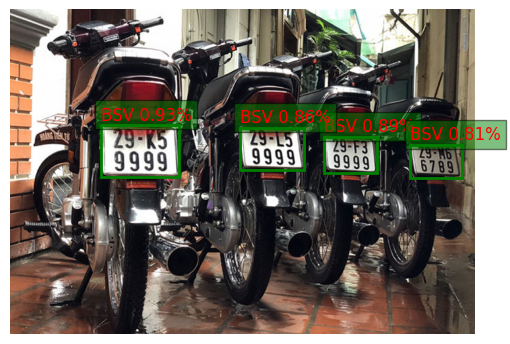

In [201]:
test_path = cur_dir + '/dataset/images/test/test_xe4.png'

predict_plot(test_path)

Use easyocr to read the liences plate

In [158]:
%pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [69]:
import easyocr

reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [159]:
import cv2

def take_bbox(test_img):
    results = model.predict(test_img, device='cpu')[0]
    boxes = results.boxes

    return boxes.xyxy[0]

def crop_img(original_img, bbox):
    img = cv2.imread(original_img)
    xmin, ymin, xmax, ymax = bbox
    
    xmin = xmin.round().int().item()
    ymin = ymin.round().int().item()
    xmax = xmax.round().int().item()
    ymax = ymax.round().int().item()

    cropped_img = img[ymin:ymax, xmin:xmax]

    plt.imshow(cropped_img)
    plt.axis('off')
    plt.show()

    return cropped_img


image 1/1 /home/lamb/project/dmml/car_plate/dataset/images/test/test_xe4.png: 224x320 4 BSVs, 19.8ms
Speed: 0.8ms preprocess, 19.8ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 320)


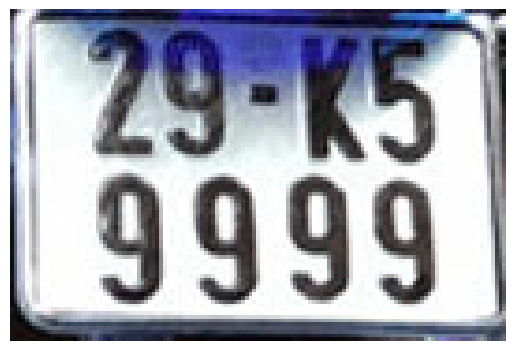

In [202]:
bbox = take_bbox(test_path)

crop = crop_img(test_path, bbox)

In [220]:
def take_number_plate(s):
    for i in range(len(s)-2):
        if s[i].isdigit() and s[i+1].isdigit() and s[i+2].isalpha():
            return s[i]+s[i+1]
    return s[0]+s[1]

In [221]:
import plate_map

def predict_plot_map(path_test_car):
    #predict
    results = model.predict(path_test_car, device='cpu')[0]
    #take the bounding box and label of the predict image
    boxes = results.boxes
    names = results.names
    img = results.orig_img

    fig, ax = plt.subplots(1, figsize=(6, 6))
    img = img[:,:,::-1]#reverse image from bgr to rgb
    ax.imshow(img)
    #draw bounding box and their hometown number
    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0]
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='green', facecolor='none')
        ax.add_patch(rect)
        
        xmin = xmin.round().int().item()
        ymin = ymin.round().int().item()
        xmax = xmax.round().int().item()
        ymax = ymax.round().int().item()

        cropped_img = img[ymin:ymax, xmin:xmax]
        read_result = reader.readtext(cropped_img)

        combine = ''
        for r in read_result:
            combine += r[1]
        print(take_number_plate(combine))
        try:
            pmap = plate_map.plate_map[str(take_number_plate(combine))]
            label_text = f'{pmap}'
        except:
            label_text = 'Việt Nam'
        plt.text(xmin, ymin - 10, label_text, color='red', fontsize=12, bbox=dict(facecolor='green', alpha=0.5))

    plt.axis('off')
    plt.show()


image 1/1 /home/lamb/project/dmml/car_plate/dataset/images/test/test_xe4.png: 224x320 4 BSVs, 20.6ms
Speed: 0.9ms preprocess, 20.6ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 320)
29
29
29
29


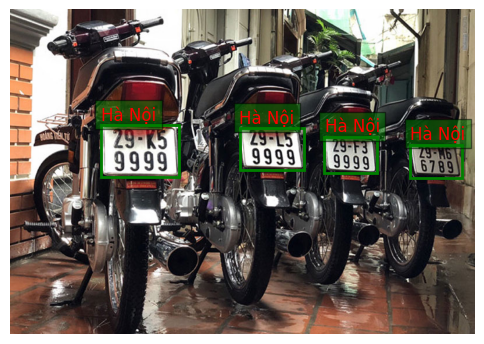

None


In [222]:
print(predict_plot_map(test_path))